In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import os
import pandas as pd
import numpy as np

# if you have the raw data

In [2]:

def read_data(cat_name):
    # Folder Path
    path = "D:\Masters - 1st semster\Data science applications\Final-Project\{}".format(cat_name)
    data, category = [],[]
    # Change the directory
    os.chdir(path)

    def read_text_file(file_path):
        with open(file_path, 'r', encoding="utf8") as f:
            data.append(f.read())
            category.append(cat_name)

    for file in os.listdir():
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}\{file}"

            # call read text file function
            read_text_file(file_path)
    return data,category
cats = ["Culture","Finance","Medical","Politics","Religion"]
data_final = pd.DataFrame()
for i in range(len(cats)):
    data_df = pd.DataFrame()
    data,cat = read_data(cats[i])
    data_df["article"] = data
    data_df["label"] = cat
    data_final = data_final.append(
        data_df[data_df.label == cats[i]].head(200), ignore_index=True)
data_final


<ipython-input-2-a7f452626faa>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data_final.append(
<ipython-input-2-a7f452626faa>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data_final.append(
<ipython-input-2-a7f452626faa>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data_final.append(
<ipython-input-2-a7f452626faa>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data_final.append(
<ipython-input-2-a7f452626faa>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_final = data_fina

,article,label
0,ينظم معهد الشارقة للفنون معرضاً فنياً تحت عنوا...,Culture
1,تقيم الفنانة ليتا كابيلوت معرضاً في مطلع العام...,Culture
2,تتواصل الليلة مسيرة التحدّي والمتعة والإثارة ض...,Culture
3,عقدت ظهر أمس الأول في قصر الثقافة في الشارقة ا...,Culture
4,اختارت صحيفة «التايمز» جورج أورويل ليحل في الم...,Culture
...,...,...
995,رب اجعلني ممن تظلهم في ظل عرشك يوم لا ظل إلا ظ...,Religion
996,د‮. ‬أحمد عمر هاشم‮ من أهم عوامل النصر الذي‮ ‬...,Religion
997,تتردد في أركانه على مدار اليوم آيات القرآن الك...,Religion
998,القاهرة «الخليج»: يُرجع العديد من الدراسات الح...,Religion


In [3]:
path = "D:\Masters - 1st semster\Data science applications\Final-Project"
os.chdir(path)
data_final.to_csv(
    "final_data.csv", encoding='utf-8')


# if you don't have the raw data

In [45]:
data_final = pd.read_csv("final_data.csv")

In [46]:
import pyarabic.araby as ar

# import Stemmer
import functools
import operator

import logging

logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)


In [47]:
arabic_stop_words = []
with open('Arabic_stop_words.txt', encoding='utf-8') as f:
    for i in f.readlines():
        arabic_stop_words.append(i)
        arabic_stop_words[-1] = arabic_stop_words[-1][:-1]
arabic_stop_words

['،',
 'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آل',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آهاً',
 'آهٍ',
 'آهِ',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أكتوبر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنه',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلى',
 'إلي',
 'إليكم',
 'إليكما',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',
 'إمّا',
 'إن',
 'إنَّ',
 'إى',
 'إياك',
 'إياكم',
 'إياكما',
 'إياكن',


In [48]:
import numpy as np
import pandas as pd
import re
import string
import emoji
#============= Read CSV and apply data preperation =============#

def data_cleaning(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"https\S+", "", text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub("(\s\d+)", "", text)
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
    text = re.sub("\d+", " ", text)
    text = ar.strip_tashkeel(text)
    text = ar.strip_tatweel(text)
    text = text.replace("#", " ")
    text = text.replace("@", " ")
    text = text.replace("_", " ")
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    em = text
    em_split_emoji = emoji.get_emoji_regexp().split(em)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    text = " ".join(em_split)
    text = re.sub(r'(.)\1+', r'\1', text)
    # text_stem = " ".join([st.stemWord(i) for i in text.split()])
    # text = text +" "+ text_stem
    text = text.replace("آ", "ا")
    text = text.replace("إ", "ا")
    text = text.replace("أ", "ا")
    text = text.replace("ؤ", "و")
    text = text.replace("ئ", "ي")

    return text

def data_preprocessing(data_frame):
    # clean-up: remove #tags, http links and special symbols
    data_frame['article'] = data_frame['article'].apply(lambda x: x[2:-2])
    data_frame['article'] = data_frame['article'].apply(
        lambda x: re.sub(r'http\S+', '', x))
    data_frame['article'] = data_frame['article'].apply(
        lambda x: re.sub(r'[@|#]\S*', '', x))
    data_frame['article'] = data_frame['article'].apply(
        lambda x: re.sub(r'"+', '', x))

    # Remove arabic signs
    data_frame['article'] = data_frame['article'].apply(lambda x: re.sub(
        r'([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', '', x))

    # Remove repeated letters like "الللللللللللللللله" to "الله"
    data_frame['article'] = data_frame['article'].apply(lambda x: x[0:2] + ''.join(
        [x[i] for i in range(2, len(x)) if x[i] != x[i-1] or x[i] != x[i-2]]))

    # remove stop words
    data_frame['article'] = data_frame['article'].apply(
        lambda x: '' if x in arabic_stop_words else x)

    from nltk.stem.isri import ISRIStemmer
    data_frame['article'] = data_frame['article'].apply(lambda x: ISRIStemmer().stem(x))

    return data_frame


data_final['article'] = data_final['article'].apply(lambda x: data_cleaning(x))
df = data_preprocessing(data_final)
df


,Unnamed: 0,article,label
0,0,ظم معهد الشارقة لفنون معرضا فنيا تحت عنوان باق...,Culture
1,1,يم الفنانة ليتا كابيلوت معرضا في مطلع العام ال...,Culture
2,2,اصل اليلة مسيرة التحدي والمتعة والاثارة ضمن ال...,Culture
3,3,دت ظهر امس الاول في قصر الثقافة في الشارقة الج...,Culture
4,4,تارت صحيفة التايمز جورج اورويل ليحل في المرتبة...,Culture
...,...,...,...
995,995,اجعلني من تظلهم في ظل عرشك يوم لا ظل الا ظلك ...,Religion
996,996,احمد عمر هاشم من اهم عوامل النصر الذي وعد اله...,Religion
997,997,د في اركانه على مدار اليوم ايات القران الكريم ...,Religion
998,998,قاهرة الخليج يرجع العديد من الدراسات الحديثة ا...,Religion


# classification

## train test split

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


df = shuffle(df)
X_train, X_test, y_train, y_test=train_test_split(df['article'], df['label'], test_size=0.3, random_state=42)
X_test


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)



In [50]:
y_train

array([1, 0, 4, 3, 0, 4, 1, 4, 4, 2, 0, 2, 0, 2, 2, 4, 3, 3, 1, 2, 0, 3,
       0, 0, 3, 3, 3, 3, 2, 1, 0, 4, 3, 0, 2, 3, 2, 3, 4, 1, 0, 0, 2, 1,
       1, 2, 0, 4, 4, 1, 4, 3, 1, 1, 2, 2, 1, 3, 0, 3, 1, 3, 0, 0, 3, 1,
       3, 2, 1, 4, 0, 2, 0, 3, 1, 3, 1, 1, 0, 1, 4, 3, 3, 4, 4, 4, 0, 2,
       4, 0, 3, 3, 3, 0, 3, 2, 4, 1, 3, 3, 2, 4, 0, 3, 0, 4, 3, 3, 2, 3,
       4, 3, 4, 4, 0, 2, 2, 0, 0, 2, 1, 0, 4, 1, 2, 4, 2, 3, 2, 4, 3, 3,
       3, 3, 4, 2, 1, 2, 4, 4, 0, 4, 0, 2, 4, 0, 1, 2, 0, 0, 2, 2, 1, 4,
       0, 3, 3, 2, 4, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 3, 2, 3, 3, 4, 4,
       2, 3, 2, 3, 1, 4, 4, 4, 3, 3, 2, 0, 1, 4, 2, 1, 1, 3, 0, 1, 4, 2,
       0, 1, 2, 4, 3, 3, 3, 2, 0, 2, 3, 4, 0, 3, 1, 2, 1, 4, 1, 4, 3, 2,
       4, 2, 4, 0, 4, 1, 2, 4, 4, 0, 3, 0, 4, 0, 0, 3, 3, 1, 2, 2, 1, 3,
       4, 3, 4, 1, 3, 3, 4, 3, 3, 0, 0, 2, 2, 1, 2, 2, 0, 4, 4, 0, 3, 2,
       4, 3, 3, 0, 2, 0, 4, 4, 3, 1, 0, 4, 0, 0, 3, 4, 4, 0, 2, 0, 2, 1,
       4, 2, 2, 1, 3, 0, 1, 0, 1, 2, 3, 0, 3, 1, 2,

In [51]:
label_encoder.inverse_transform(
    y_train)


array(['Finance', 'Culture', 'Religion', 'Politics', 'Culture',
       'Religion', 'Finance', 'Religion', 'Religion', 'Medical',
       'Culture', 'Medical', 'Culture', 'Medical', 'Medical', 'Religion',
       'Politics', 'Politics', 'Finance', 'Medical', 'Culture',
       'Politics', 'Culture', 'Culture', 'Politics', 'Politics',
       'Politics', 'Politics', 'Medical', 'Finance', 'Culture',
       'Religion', 'Politics', 'Culture', 'Medical', 'Politics',
       'Medical', 'Politics', 'Religion', 'Finance', 'Culture', 'Culture',
       'Medical', 'Finance', 'Finance', 'Medical', 'Culture', 'Religion',
       'Religion', 'Finance', 'Religion', 'Politics', 'Finance',
       'Finance', 'Medical', 'Medical', 'Finance', 'Politics', 'Culture',
       'Politics', 'Finance', 'Politics', 'Culture', 'Culture',
       'Politics', 'Finance', 'Politics', 'Medical', 'Finance',
       'Religion', 'Culture', 'Medical', 'Culture', 'Politics', 'Finance',
       'Politics', 'Finance', 'Finance', 'Cultur

## Feature Extraction

In [52]:
type(X_train)

pandas.core.series.Series

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


def bow(X_train, X_tes):
    BOW = CountVectorizer()
    BOW_train = BOW.fit_transform(X_train)
    BOW_test = BOW.transform(X_tes)
    return BOW_train,BOW_test

def tfidf_ngram(n_gram, X_train, X_tes):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram, n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    x_test_vec = vectorizer.transform(X_tes)
    return x_train_vec, x_test_vec, vectorizer



In [54]:
BOW_train,BOW_test = bow(X_train, X_test)

In [55]:
X_trained1g_cv, X_test1g_cv,vector_1gram = tfidf_ngram(1, X_train, X_test)
X_trained2g_cv, X_test2g_cv,_ = tfidf_ngram(2, X_train, X_test)

### data shape for classification

In [56]:
X_trained1g_cv.shape

(700, 47543)

## Modelling

In [15]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


In [16]:
text_embedding = {
    'BOW': (BOW_train, BOW_test),
    'TF_IDF 1_gram': (X_trained1g_cv, X_test1g_cv),
    'TF_IDF 2_gram': (X_trained2g_cv, X_test2g_cv),
}
models = [SVC(),
          GaussianNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(max_depth=10)
          ]
highest_test_accuracy = 0
champion_model_name = ''
champion_model = ''
champion_embedding = ''
results_dict = {'Model Name': [], 'Embedding type': [],
                'Training Accuracy': [], 'Testing Accuracy': []}

for model in models:
  for embedding_vector in text_embedding.keys():
    if 'gram' in embedding_vector or 'BOW' in embedding_vector:
        train = text_embedding[embedding_vector][0].toarray()
        test = text_embedding[embedding_vector][1].toarray()
    else:
        train = text_embedding[embedding_vector][0]
        test = text_embedding[embedding_vector][1]
    model.fit(train, y_train)
    # scores=cross_validate(model,train,y_train,cv=10,return_estimator=True)
    # model=scores['estimator'][scores['test_score'].argmax()]

    # print('Model Name',type(model).__name__)
    results_dict['Model Name'].append(type(model).__name__)
    # print('Using',embedding_vector)
    results_dict['Embedding type'].append(embedding_vector)
    train_acc = model.score(train, y_train)
    # print("Training accuracy",train_acc)
    results_dict['Training Accuracy'].append(train_acc)
    test_acc = model.score(test, y_test)
    # print('Testing accuracy',test_acc)
    results_dict['Testing Accuracy'].append(test_acc)
    # print('*'*40)
    if test_acc > highest_test_accuracy:
      highest_test_accuracy = test_acc
      champion_model_name = type(model).__name__
      champion_model = model
      champion_embedding = embedding_vector

results_df = pd.DataFrame(results_dict)

print('champion_model is ', champion_model_name)
print('champion_embedding is', champion_embedding)


champion_model is  SVC
champion_embedding is TF_IDF 1_gram


In [17]:
results_df['Model Name'] = results_df['Model Name'].apply(
    lambda x: x[:-10] if 'Classifier' in x else x)
results_df


,Model Name,Embedding type,Training Accuracy,Testing Accuracy
0,SVC,BOW,0.900000,0.756667
1,SVC,TF_IDF 1_gram,1.000000,0.923333
2,SVC,TF_IDF 2_gram,1.000000,0.870000
3,GaussianNB,BOW,1.000000,0.843333
4,GaussianNB,TF_IDF 1_gram,1.000000,0.840000
5,GaussianNB,TF_IDF 2_gram,1.000000,0.910000
6,KNeighbors,BOW,0.678571,0.610000
7,KNeighbors,TF_IDF 1_gram,0.922857,0.903333
8,KNeighbors,TF_IDF 2_gram,0.910000,0.893333
9,DecisionTree,BOW,0.894286,0.726667


## Evaluate

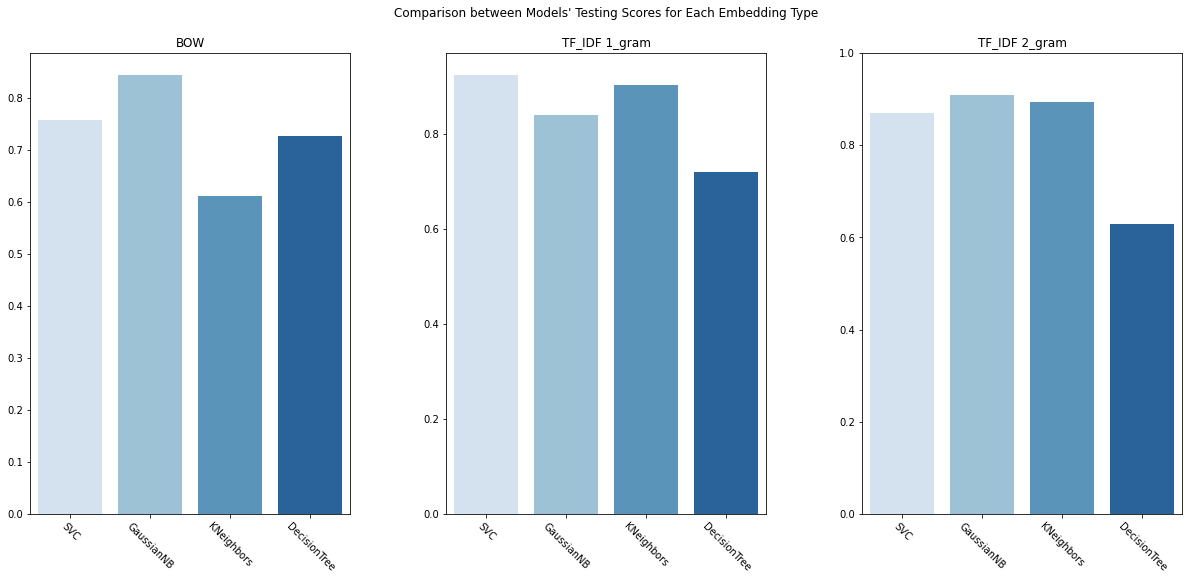

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3,  figsize=(20, 8))

fig.suptitle(
    "Comparison between Models' Testing Scores for Each Embedding Type")
k = 0

for i in range(0, 3):
    embed_type = results_df['Embedding type'].unique()[k]
    plt.ylim((0, 1))
    axes[i].tick_params(axis='x', rotation=-45)
    axes[i].set_title(f"{embed_type}")
    sns.barplot(ax=axes[i], x=list(results_df['Model Name'].unique()), y=list(
        results_df[results_df['Embedding type'] == embed_type]['Testing Accuracy']), palette="Blues")
    k += 1
plt.ylim([0, 1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)



## predict summarized text

In [19]:
def class_champ_model_pred(xtest):
    return champion_model.predict(xtest)


# clustering

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
from sklearn.metrics import cohen_kappa_score
warnings.filterwarnings('ignore')


## train test split

In [21]:
df = shuffle(df)
X_train, y_actual = df['article'].to_numpy(), df['label'].to_numpy()
y_actual
y_actual = label_encoder.fit_transform(y_actual)

In [22]:

def bow(X_train):
    BOW = CountVectorizer()
    BOW_train = BOW.fit_transform(X_train)
    return BOW_train


def tfidf_ngram(n_gram, X_train):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram, n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    return x_train_vec,vectorizer


BOW_train = bow(X_train)

X_trained1g_cv,vect2 = tfidf_ngram(1, X_train)
X_trained2g_cv,_ = tfidf_ngram(2, X_train)


In [23]:
text_embedding = {
    'BOW': BOW_train,
    'TF_IDF 1_gram': X_trained1g_cv,
    'TF_IDF 2_gram': X_trained2g_cv,
}


## visualize actual clusters after feature extraction

In [24]:
import plotly.express as px
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=2,)
embedding = text_embedding.copy()

for key in embedding.keys():
  embedding[key] = pca.fit_transform(embedding[key])
  df = pd.DataFrame(
      {'PCA1': embedding[key][:, 0], 'PCA2': embedding[key][:, 1], 'Target': y_actual})
  fig = px.scatter(data_frame=df, x='PCA1', y='PCA2', color='Target')
  fig.update_layout(title={'text': f'{key}', 'x': 0.5}, height=500, width=700)
  fig.show()


## Modelling

In [25]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_elb_results = dict()
    kmeans_sil_results = dict()
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10,
                        max_iter=300, random_state=42, algorithm='full')
        kmeans.fit(data)
        kmeans_elb_results.update({k: kmeans.inertia_})
        kmeans_sil_results.update({k: silhouette_score(data, kmeans.labels_)})

    return kmeans_elb_results, kmeans_sil_results


In [26]:
kmeans_elb_vec = dict()
kmeans_sil_vec = dict()
for k, v in text_embedding.items():
    kmeans_elb_results, kmeans_sil_results = run_KMeans(10, v)
    kmeans_elb_vec[k] = kmeans_elb_results
    kmeans_sil_vec[k] = kmeans_sil_results


## Evaluate

In [27]:
fig = make_subplots(rows=1, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
i=j=1
for elb_vec_key, elb_vec_value in kmeans_elb_vec.items():
        fig.add_trace( 
            go.Scatter(
                x=list(elb_vec_value.keys()),
                y=list(elb_vec_value.values()),
                mode='lines',
                name=elb_vec_key,
                      ),row=i, col=j)
        j+=1
        if j == 4:
            j=1
            i+=1
fig.update_layout(height=500, width=1000,title={'text':'K Means for each vectorizer using Elbow Method','x':0.5})
fig.show()

In [28]:
fig = make_subplots(rows=1, cols=3, horizontal_spacing=0.1,
                    vertical_spacing=0.1)
i = j = 1
for sil_vec_key, sil_vec_value in kmeans_sil_vec.items():
    fig.add_trace(
        go.Scatter(
            x=list(sil_vec_value.keys()),
            y=list(sil_vec_value.values()),
            mode='lines',
            name=sil_vec_key,
        ), row=i, col=j)
    j += 1
    if j == 4:
        j = 1
        i += 1
fig.update_layout(height=500, width=1000, title={
                  'text': 'K Means for each vectorizer using Silhouette Method', 'x': 0.5})
fig.show()


In [29]:
def apply_PCA(data):
    pca = TruncatedSVD(n_components=2)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data=principalComponents, columns=[
                               'principal component 1', 'principal component 2'])
    return principalDf


pca_df = apply_PCA(text_embedding['TF_IDF 1_gram'])
pca_df_final = pd.concat([pca_df, pd.Series(y_actual, name='target')], axis=1)
pca_df_final


,principal component 1,principal component 2,target
0,0.218037,-0.162323,2
1,0.484483,0.440372,1
2,0.110546,-0.072403,2
3,0.141189,-0.127417,3
4,0.094887,-0.076370,3
...,...,...,...
995,0.115846,-0.088635,0
996,0.177909,-0.171701,0
997,0.120260,-0.108224,3
998,0.085476,-0.081967,3


In [30]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10,
                max_iter=300, random_state=42, algorithm='full')
kmeans.fit(pca_df)
kmeans_labels = kmeans.predict(pca_df)
kmeans_df_final = pd.concat(
    [pca_df, pd.Series(kmeans_labels, name='target')], axis=1)
centroids = kmeans.cluster_centers_
kmeans_df_final


,principal component 1,principal component 2,target
0,0.218037,-0.162323,4
1,0.484483,0.440372,1
2,0.110546,-0.072403,2
3,0.141189,-0.127417,4
4,0.094887,-0.076370,2
...,...,...,...
995,0.115846,-0.088635,2
996,0.177909,-0.171701,4
997,0.120260,-0.108224,2
998,0.085476,-0.081967,2


In [31]:
from plotly.subplots import make_subplots
fig1 = px.scatter(data_frame=pca_df_final, x='principal component 1',
                  y='principal component 2', color='target')
fig1.update_layout({'title': {
                   'text': 'The Clusters with Actual Labels', 'x': 0.5}}, height=600, width=600)
fig1.show()
fig2 = px.scatter(data_frame=kmeans_df_final, x='principal component 1',
                  y='principal component 2', color='target')
fig2.update_layout(annotations=[
    dict(
        font=dict(color='black', size=30),
        showarrow=False,
        x=centroids[0][0],
        y=centroids[0][1],
        text="X"),
    dict(
        font=dict(color='black', size=30),
        showarrow=False,
        x=centroids[1][0],
        y=centroids[1][1],
        text="X",
    ),
    dict(font=dict(color='black', size=30),
         showarrow=False,
         x=centroids[2][0],
         y=centroids[2][1],
         text="X",
         ),
    dict(
        font=dict(color='black', size=30),
        showarrow=False,
        x=centroids[3][0],
        y=centroids[3][1],
        text="X",
    ), dict(
        font=dict(color='black', size=30),
        showarrow=False,
        x=centroids[4][0],
        y=centroids[4][1],
        text="X",
    )], height=600, width=600)
fig2.update_layout(
    {'title': {'text': 'The Clusters with K-means', 'x': 0.5}, }, height=600, width=600)
fig2.show()


## cluster Champion model predict

In [32]:
def clust_champ_model_pred(xtest):
    return kmeans.predict(xtest)


# Save Champion Models for classifiaction and clustering

In [33]:
import pickle
champs = {
    "tf-idf-class": vector_1gram,
    "tf-idf-clust": vect2,
    "classification": champion_model,
    "cluster": kmeans
}

with open("champion_models.pickle", "wb") as file:
    pickle.dump(champs, file, pickle.HIGHEST_PROTOCOL)


In [34]:
with open("champion_models.pickle", "rb") as file:
    models = pickle.load(file)

models.keys()

dict_keys(['tf-idf-class', 'tf-idf-clust', 'classification', 'cluster'])

### data shape for clustering

In [44]:
X_trained1g_cv.shape


(1000, 59336)